In [ ]:
import torch 
import torchvision # torchvision package : 컴퓨터 비전을 위한 유명 데이터셋, 모델 아키텍처, 이미지 변형등을 포함
import torch.nn as nn # nn : neural netwroks (define class) attribute를 활용해 state를 저장하고 활용
import torch.optim as optim # 최적화 알고리즘
import torch.nn.functional as F # (define function) 인스턴스화 시킬 필요없이 사용 가능
from PIL import Image
from torchvision import transforms, datasets # transforms : 데이터를 조작하고 학습에 적합하게 만듦.
from torch.utils.data import Dataset, DataLoader
# dataset : 샘플과 정답(label)을 저장
# DataLoader : Dataset 을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감싼다.

In [ ]:
epochs = 10
batch_size = 128 #  batch size of 128

device = ('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_transform = transforms.Compose([
    # 224 × 224 × 3 input image
    transforms.Resize(224),
    #The first form of data augmentation consists of generating image translations and horizontal reflections
    transforms.RandomHorizontalFlip(0.5),#주어진 확률로 주어진 이미지를 무작위로 수평으로 뒤집습니다.
    #The second form of data augmentation consists of altering the intensities of the RGB channels in training images.
    transforms.ColorJitter(hue=0.3),#torchvision.transforms.ColorJitter( 밝기 = 0 , 대비 = 0 , 채도 = 0 , 색조 = 0 )
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])
train_data = datasets.CIFAR10(
    root = 'data',
    train = True,
    download = True,
    transform=train_transform
)
test_data = datasets.CIFAR10(
    root = 'data',
    train = False,
    download = True,
    transform=test_transform
)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class AlexNet(nn.Module):
  def __init__(self):
    super(AlexNet,self).__init__()
    self.conv_layers = nn.Sequential(
        #The first convolutional layer filters the 224 × 224 × 3 input image with 96 kernels of size 11 × 11 × 3 with a stride of 4 pixels
        nn.Conv2d(3,96,kernel_size=11,stride=4),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(96),
        nn.MaxPool2d(kernel_size=3,stride=2),#26x26x96
        #The second convolutional layer takes as input the (response-normalized and pooled) output of the first convolutional layer and filters it with 256 kernels of size 5 × 5 × 48.
        nn.Conv2d(96,256,kernel_size=5,padding=2),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(256),
        nn.MaxPool2d(kernel_size=3,stride=2),
        #The third convolutional layer has 384 kernels of size 3 × 3 × 256 connected to the (normalized, pooled) outputs of the second convolutional layer.
        nn.Conv2d(256,384,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(384),
        #The fourth convolutional layer has 384 kernels of size 3 × 3 × 192
        nn.Conv2d(384,384,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(384),
        # fifth convolutional layer has 256 kernels of size 3 × 3 × 192
        nn.Conv2d(384,256,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(256),
        nn.MaxPool2d(kernel_size=3, stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Linear(256 * 5 * 5, 4096),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(4096,4096),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(4096, 10),
    )

  def forward(self,x):
    output = self.conv_layers(x)
    output = output.view(output.size(0), -1)
    output = self.classifier(output)
      
    return output

In [ ]:
model = AlexNet().to(device)
loss_fn = F.cross_entropy
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9,weight_decay=0.0005) #stochastic gradient descent(momentum of 0.9, and weight decay of 0.0005.)
print(model)

AlexNet(
  (conv_layers): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU(inplace=True)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Conv2d(384, 256, ke

In [ ]:
!pip install torchviz

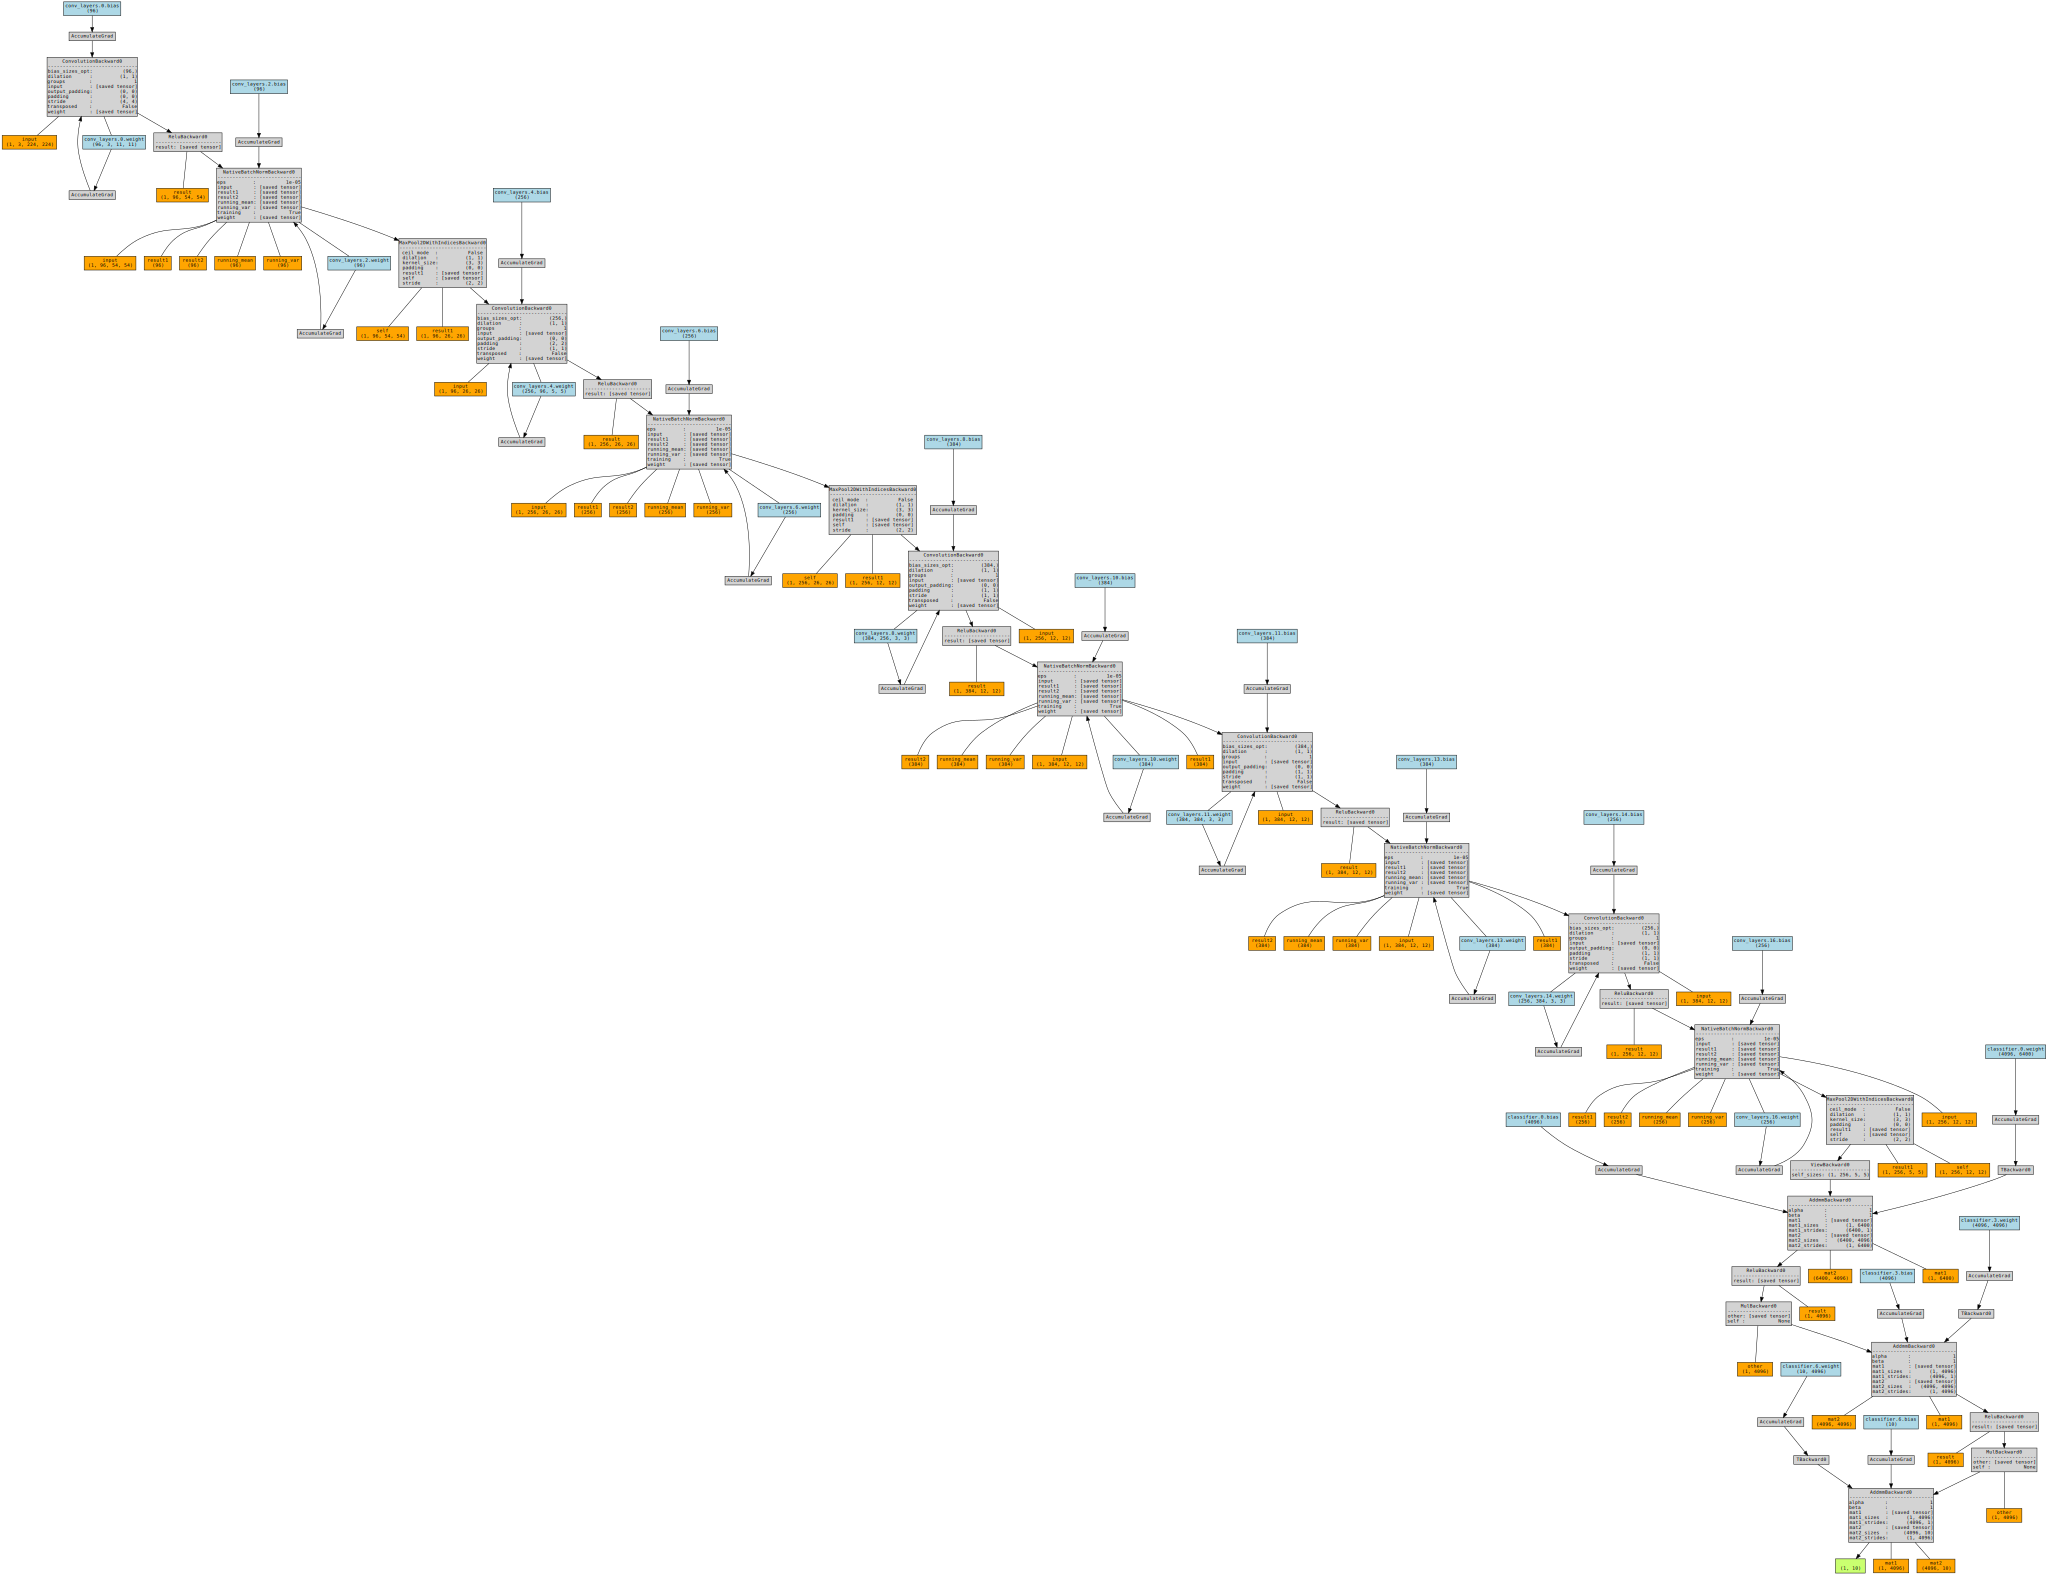

In [ ]:
from torchviz import make_dot

x = torch.zeros(1,3,224,224)
models = AlexNet()
#make_dot(models(x),params=dict(list(models.named_parameters())))
make_dot(models(x),params=dict(list(models.named_parameters())),show_attrs=True, show_saved=True)

In [ ]:
train_accu = []
train_losses = []

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    running_loss=0
    correct=0
    total=0

    for batch_idx, (data, target) in enumerate(train_loader):
        # enumberate() : 인덱스와 원소로 이루어진 튜플(tuple)을 만들어줌
        target = target.type(torch.LongTensor)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad() # 항상 backpropagation 하기전에 미분(gradient)을 zero로 만들어주고 시작해야 한다.
        output = model(data)
        loss = loss_fn(output, target) # criterion = loss_fn
        loss.backward()
        optimizer.step() # step() : 파라미터를 업데이트함

        running_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

    train_loss=running_loss/len(train_loader)
    accu=100.*correct/total
   
    train_accu.append(accu)
    train_losses.append(train_loss)
    
    print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
eval_losses=[]
eval_accu=[]

def test(model, device, test_loader):
    model.eval() # dropout,batchnorm등의 기능을 비활성화 시켜 추론 모드로 조정
    running_loss=0
    correct=0
    total=0
    with torch.no_grad(): # autograd engine을 비활성화 시켜 필요한 메모리를 줄여주고 연산속도를 증가시킴
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            running_loss += loss_fn(output, target, reduction='sum').item() # loss.item() 으로 loss가 갖고 있는 스칼라 값을 가져올 수 있음
            pred = output.max(1, keepdim=True)[1]# 텐서에서 최대값을 구하는 함수, keepdim ( bool ) – 출력 텐서가 dim유지되었는지 여부. 기본값: False., https://www.inflearn.com/questions/282058
            total += target.size(0)
            #correct += pred.eq(labels).sum().item()
            correct += pred.eq(target.view_as(pred)).sum().item() # pred.eq(data)는 pred배열과 data가 일치하느냐를 검사

        test_loss = running_loss/len(test_loader.dataset)  
        accu=100.*correct/total
 
        eval_losses.append(test_loss)
        eval_accu.append(accu)
        print('Test Loss: %.3f | Accuracy: %.3f'%(test_loss,accu)) 
        print('-----------------------------------')

In [ ]:
for epoch in range(1, epochs+1):
  print(f"Epoch {epoch}")
  train(model, device, train_loader, optimizer, epoch)
  test(model, device, test_loader)

Epoch 1
Train Loss: 1.504 | Accuracy: 46.080
Test Loss: 1.257 | Accuracy: 54.700
-----------------------------------
Epoch 2
Train Loss: 1.031 | Accuracy: 63.936
Test Loss: 1.122 | Accuracy: 60.570
-----------------------------------
Epoch 3
Train Loss: 0.833 | Accuracy: 71.152
Test Loss: 0.870 | Accuracy: 70.040
-----------------------------------
Epoch 4
Train Loss: 0.717 | Accuracy: 75.188
Test Loss: 0.748 | Accuracy: 74.280
-----------------------------------
Epoch 5
Train Loss: 0.624 | Accuracy: 78.414
Test Loss: 0.894 | Accuracy: 69.010
-----------------------------------
Epoch 6
Train Loss: 0.551 | Accuracy: 80.900
Test Loss: 0.624 | Accuracy: 78.480
-----------------------------------
Epoch 7
Train Loss: 0.494 | Accuracy: 82.904
Test Loss: 0.667 | Accuracy: 77.290
-----------------------------------
Epoch 8
Train Loss: 0.440 | Accuracy: 84.870
Test Loss: 0.542 | Accuracy: 82.110
-----------------------------------
Epoch 9
Train Loss: 0.393 | Accuracy: 86.256
Test Loss: 0.559 | 

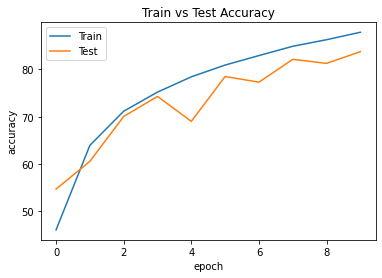

In [ ]:
import matplotlib.pyplot as plt


plt.plot(train_accu)
plt.plot(eval_accu)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuracy')
 
plt.show()

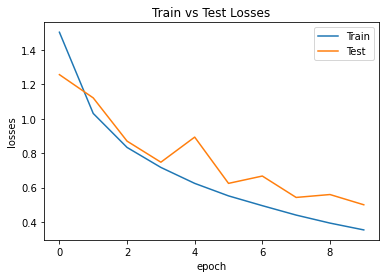

In [ ]:
plt.plot(train_losses)
plt.plot(eval_losses)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Test'])
plt.title('Train vs Test Losses')
 
plt.show()

In [ ]:
classes = ['airplane', 'automobile', 'bird','cat','deer', 'dog', 'frog','horse','ship','truck']

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device),target.to(device)
        outputs = model(data)
        _, predictions = torch.max(outputs, 1)
        #predictions = outputs.max(1, keepdim=True)[1]
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(target, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 82.2 %
Accuracy for class: automobile is 89.1 %
Accuracy for class: bird  is 74.5 %
Accuracy for class: cat   is 66.1 %
Accuracy for class: deer  is 86.1 %
Accuracy for class: dog   is 73.6 %
Accuracy for class: frog  is 90.0 %
Accuracy for class: horse is 87.0 %
Accuracy for class: ship  is 93.6 %
Accuracy for class: truck is 95.1 %
